## Concatenate DataFrames

## Load data files

They must be in a dictionary with a key name to access each DataFrame.

In [2]:
import glob

paths = glob.glob('data/*.xlsx')
paths

['data/GOOGL.xlsx',
 'data/AMZN.xlsx',
 'data/AAPL.xlsx',
 'data/MSFT.xlsx',
 'data/IBM.xlsx']

In [5]:
import os
import pandas as pd

df1 = pd.read_excel('data/GOOGL.xlsx', index_col=0, parse_dates=True)
df2 = pd.read_excel('data/AMZN.xlsx', index_col=0, parse_dates=True)

In [6]:
df1

,open,high,low,close,volume
2024-04-05,150.03,153.42,149.60,152.500,23328522
2024-04-04,153.50,154.77,150.45,150.530,34468227
...,...,...,...,...,...
2004-08-20,101.01,109.08,100.50,108.310,22834300
2004-08-19,100.01,104.06,95.96,100.335,44659000


In [8]:
df2

,open,high,low,close,volume
2024-04-05,182.38,186.27,181.97,185.07,42072115
2024-04-04,184.00,185.10,180.00,180.00,41197087
...,...,...,...,...,...
1999-11-02,69.75,70.00,65.06,66.44,13243200
1999-11-01,68.06,71.88,66.31,69.13,12824100


## Concatenate DataFrames

https://pandas.pydata.org/docs/user_guide/merging.html

### Vertical

In [15]:
df1['ticker'] = 'GOOGL'
df2['ticker'] = 'AMZN'

df = pd.concat([df1, df2], axis=0)
df

,open,high,low,close,volume,ticker
2024-04-05,150.03,153.42,149.60,152.50,23328522,GOOGL
2024-04-04,153.50,154.77,150.45,150.53,34468227,GOOGL
...,...,...,...,...,...,...
1999-11-02,69.75,70.00,65.06,66.44,13243200,AMZN
1999-11-01,68.06,71.88,66.31,69.13,12824100,AMZN


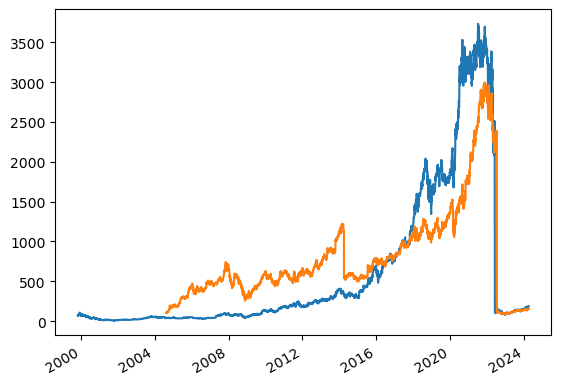

In [18]:
df.groupby('ticker').close.plot();

---

### Horizontal

In [19]:
df = pd.concat([df1, df2], axis=1)
df

,open,high,low,close,volume,ticker,open,high,low,close,volume,ticker
1999-11-01,NaN,NaN,NaN,NaN,NaN,NaN,68.06,71.88,66.31,69.13,12824100,AMZN
1999-11-02,NaN,NaN,NaN,NaN,NaN,NaN,69.75,70.00,65.06,66.44,13243200,AMZN
...,...,...,...,...,...,...,...,...,...,...,...,...
2024-04-04,153.50,154.77,150.45,150.53,34468227.0,GOOGL,184.00,185.10,180.00,180.00,41197087,AMZN
2024-04-05,150.03,153.42,149.60,152.50,23328522.0,GOOGL,182.38,186.27,181.97,185.07,42072115,AMZN


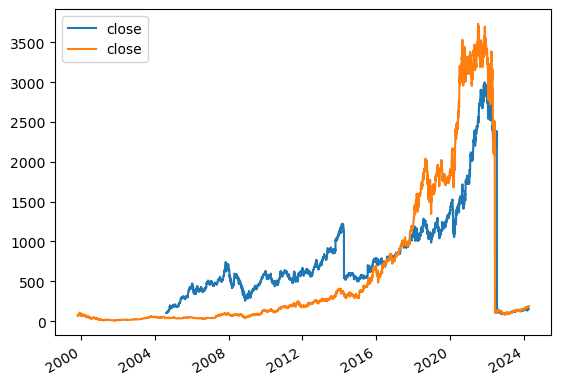

In [20]:
df.filter(like='close').plot();